## Data Visualization
- In this lab, we will cover Data Visualization techniques using famous library known as Matplotlib.
- Data Visualization is essential steps when you want to communicate your findings with your stakeholders or any other interested parties.
- Apart from matplotlib, there are several other Data visualization tools/technologies available. However learning matplotlib will make your path easier in learning other visualizations tools as well.
- Matplotlib is a widely-used Python library for creating static, interactive, and animated visualizations. It provides a flexible and easy-to-use interface for generating various types of plots, charts, and graphs.
- **Plotting in Pandas:**
    - Pandas also has built-in implementation via `plot()` method.
    - So plotting in pandas is easy appending `plot()` method to series or dataframe via dot operators.
        - `df.plot()`
        - `series.plot()`
- We'll try to cover following plots:
    - Scatter plot
    - Line Plot
    - Bar plot
    - Pie Chart
    - Area Chart
    - Violin plot
    - Heatmap
    - Bubble plot

## About Dataset
- We will be using HR analytics dataset which is about whether the employees leaves company or not based on some features.
- **`Questions that will be answered by data are?`**
    1. `How does the average satisfaction level change with increasing years of employment?`
    2. `How many employees have spent a specific number of years (time spent in the company)?`
    3. `What is the distribution of satisfaction levels among employees?`
    4. `What is the distribution of work accidents among departments?`
    5. `What is the distribution of promotions based on departments?`
    6. `How does employee satisfaction vary across different departments?`
    7. `How does employee performance (satisfaction level, last evaluation, and average monthly hours) vary?`
    7. `How are the numerical variables correlated with each other?`

## Import Libraries

In [3]:
import pandas as pd
import numpy as np

# load matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt 

Let's verify our import by printing the version of respective python libraries

In [5]:
print(f"Numpy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {mpl.__version__}")

Numpy version: 1.24.4
Pandas version: 1.4.0
Matplotlib version: 3.6.3


## Load and Prepare Data
- In this section we will load csv data and prepare it in a format that is ready to answer the questions that we have defined.

In [7]:
# read csv 
data_path = "../../Data/HR_comma_sep.csv"

df_hr = pd.read_csv(data_path)

df_hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [8]:
# check data type

df_hr.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [9]:
# extract columns

df_hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

- Since we have explored data already in the Pandas section so we will directly move towards Visualization part.
- If you feel difficulty, you can refer to Pandas section.

## Questions

- **`1.How does the average satisfaction level change with increasing years of employment?`**    

    - This questions can be answered via `line plot.`
    - `Line plot:`
        - Line plots are best suited for trend-based visualizations of data over a period of time.  
        - Line plots are used when dataset is continuous. 

In [11]:
# calculate average satisfaction level for each years of employment

avg_satisfaction_by_years = df_hr.groupby('time_spend_company').agg({'satisfaction_level': 'mean'})

avg_satisfaction_by_years   

,satisfaction_level
time_spend_company,
2,0.697078
3,0.626314
4,0.467517
5,0.610305
6,0.603440
7,0.635957
8,0.665062
10,0.655327


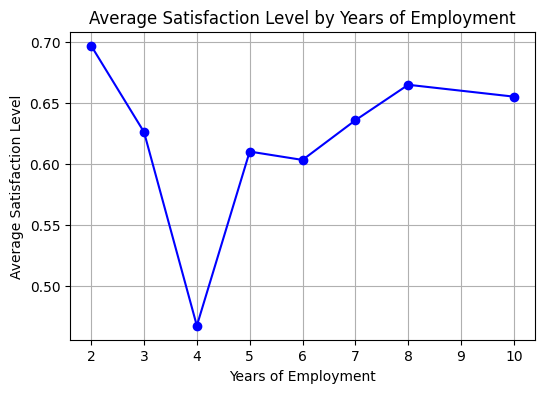

In [17]:
# create a line plot of average satisfaction level by years of employment

# define figure size of (10, 6)
plt.figure(figsize=(6, 4))

# extract x_data and y_data of line plot
x_data = avg_satisfaction_by_years.index
y_data = avg_satisfaction_by_years.values

# create line plot
plt.plot(x_data, y_data, marker='o', color='b')

# define x_label, y_label, title
plt.xlabel('Years of Employment')
plt.ylabel('Average Satisfaction Level')
plt.title('Average Satisfaction Level by Years of Employment')
plt.grid(True) # for grid to be displayed
plt.show()

- From above,
    - Decrease Trend: At start satisfaction_level is high and it decreases upto 4 years.
    - Increase Trend: After 4 years the satisfaction_level starts increasing.

In [18]:
df_hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


**`Q.2. How many employees have spent a specific number of years (time spent in the company)?`**
- This questions can be answered via: `Bar plot`.
- Bar plot is one of the easy and popular visualization tools.
- Bar plot can be used to compare the value of the variable via frequency count.


In [22]:
# get years spent
years_count = df_hr['time_spend_company'].value_counts()
years_count

3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: time_spend_company, dtype: int64

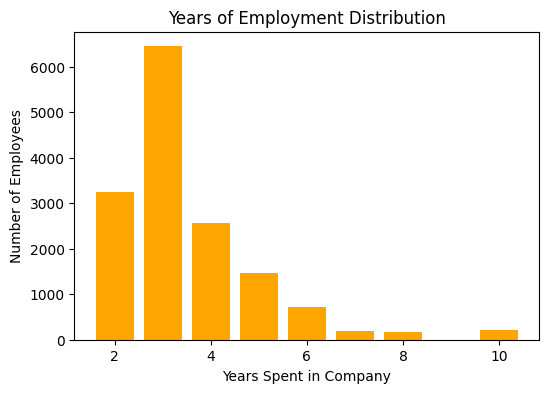

In [25]:
# get x_data and y_data
x_data = years_count.index
y_data = years_count.values

# define figure size
plt.figure(figsize=(6, 4))

# create bar plot
plt.bar(x_data, y_data, color='orange')

# set xlabel, ylabel, and title
plt.xlabel('Years Spent in Company')
plt.ylabel('Number of Employees')
plt.title('Years of Employment Distribution')
plt.show()

- Most employees spent 3 years in company.
- After 3 years time spend in company is decreasing upto 9 years.
- But there are some number of people who are staying even for 10 years.

**`Q.3 What is the distribution of satisfaction levels among employees?`**
-   This can be answered by `histogram plot`
    - Histogram plots maps continuous data into bins and plot frequency of data in each bins.
    - Helpful in visualizing Distributions of continuous data.

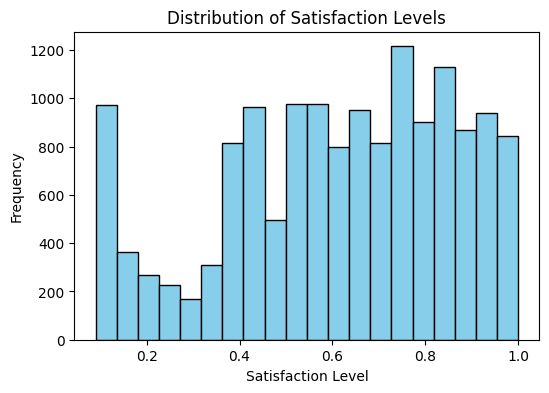

In [28]:
# create a histogram plots of satisfaction level

# define figure
plt.figure(figsize=(6, 4))

# create a histogram plot
# set bins = 20, color=skyblue, edgecolor=black

plt.hist(df_hr['satisfaction_level'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.title('Distribution of Satisfaction Levels')
plt.show()

- This shows that distributions of `satisfaction_level` column is not Normal Distribution.
- We can say, `satisfaction_level` is slightly left skewed.